## Time Series Prediction using LSTM

### Download Data
Link: https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line

#### Description
Daily minimum temperatures in Melbourne, Australia, 1981-1990

Units: Degrees Celcius

#### Steps before loading
- Rename the column name with temprature values to "Temprature"
- In the last, there is one extra row in the data, remove it by opening the file and save it again.
- There are some values in Temprature column which have a "?" before them, they will give error, remove "?" before them and save the file
- If you don't want to do these steps, just load the data file given by Great Learning.

#### Mount google drive

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Change your present working directory

In [0]:
curDir = '/content/drive/My Drive/iPYTHON TF/08.03.2020/Internal_LAB/'
import os
os.chdir(curDir)

### Load your data file

In [0]:
import pandas as pd
df = pd.read_csv('daily-minimum-temperatures-in-me.csv')

#### Plot data

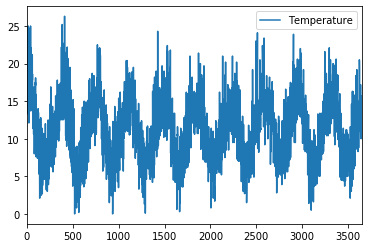

In [122]:
df.plot()

#### Descibe your dataframe

In [123]:
df['Temprature'] = df[['Temperature']]
df.drop(['Temperature', 'Date'], axis=1, inplace=True)
df

,Temprature
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8
...,...
3645,14.0
3646,13.6
3647,13.5
3648,15.7


#### Check for null values

In [124]:
df.isnull().sum()

Temprature    0
dtype: int64

#### Drop null values

In [0]:
#No null values

#### Get the representation of the distribution of data in the form of histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41d8f19320>]],
      dtype=object)

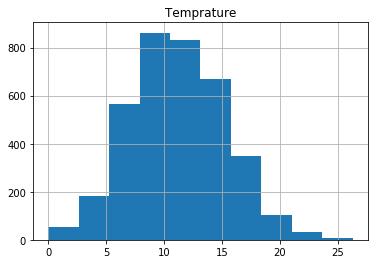

In [126]:
df.hist()

#### Check the maximum and minimum values

In [127]:
print("Minimum value of" , df.min())
print("Maximum value of" , df.max())


Minimum value of Temprature    0.0
dtype: float64
Maximum value of Temprature    26.3
dtype: float64


### Normalize the data

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df)

#### Check the maximum and minimum values of scaled data

In [129]:
print("Minimum value of Scaled Temperature is " , scaled.min())
print("Maximum value of Scaled Temperature is " , scaled.max())

Minimum value of Scaled Temperature is  0.0
Maximum value of Scaled Temperature is  1.0


#### Look into some of the scaled values

In [130]:
scaled[0:10,:]

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       [0.55513308],
       [0.60076046],
       [0.60076046],
       [0.60076046],
       [0.66159696],
       [0.82889734],
       [0.76045627]])

### Split data into Training and Testing

In [0]:
#70% examples will used for training (in the begining)
train_size = int(len(scaled) * 0.70)

#30% will be used for Test
test_size = len(scaled) - train_size

#Split the data
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]

#### Print train and test size

In [132]:
print('train size is : {}\ntest size is : {}'.format(len(train), len(test)))

train size is : 2555
test size is : 1095


## Create the sequential data
Map the temprature at a particular time t to the temprature at time t+n, where n is any number you define.

For example: to map tempratures of consecutive days, use t+1, i.e. loop_back = 1

#### Define your function to create dataset

In [0]:
import numpy as np
#window - how long the sequence will be
def create_dataset(dataset, window):#=5):
    
    dataX, dataY = [], []
    
    for i in range(len(dataset)-window):
        
        a = dataset[i:(i+window),0]        
        dataX.append(a)
        dataY.append(dataset[i + window, 0])
    
    return np.array(dataX), np.array(dataY)

#### Use function to get training and test set

In [0]:
#Create Input and Output
window_size = 20
X_train, y_train = create_dataset(train, window_size)
X_test, y_test = create_dataset(test, window_size)

#### Transform the prepared train and test input data into the expected structure using numpy.reshape()

In [135]:
#Make it 3 Dimensional Data - needed for LSTM
print(X_train.shape)
print(X_test.shape)

X_train = np.reshape(X_train, (X_train.shape[0], 20, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 20, 1))
print(X_train.shape)
print(X_test.shape)

(2535, 20)
(1075, 20)
(2535, 20, 1)
(1075, 20, 1)


## Define Model

### Define sequntial model, add LSTM layer and compile the model

In [0]:
import tensorflow as tf

tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(32, input_shape=(window_size, 1)))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

### Summarize your model

In [137]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4352      
_________________________________________________________________
dense (Dense)                (None, 10)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 4,693
Trainable params: 4,693
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [138]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)

Train on 2535 samples, validate on 1075 samples
Epoch 1/100
2535/2535 [==============================] - 2s 827us/sample - loss: 0.0233 - val_loss: 0.0105
Epoch 2/100
2535/2535 [==============================] - 1s 558us/sample - loss: 0.0111 - val_loss: 0.0096
Epoch 3/100
2535/2535 [==============================] - 1s 561us/sample - loss: 0.0108 - val_loss: 0.0096
Epoch 4/100
2535/2535 [==============================] - 1s 554us/sample - loss: 0.0107 - val_loss: 0.0092
Epoch 5/100
2535/2535 [==============================] - 1s 576us/sample - loss: 0.0105 - val_loss: 0.0093
Epoch 6/100
2535/2535 [==============================] - 1s 587us/sample - loss: 0.0104 - val_loss: 0.0089
Epoch 7/100
2535/2535 [==============================] - 1s 521us/sample - loss: 0.0103 - val_loss: 0.0088
Epoch 8/100
2535/2535 [==============================] - 1s 578us/sample - loss: 0.0102 - val_loss: 0.0093
Epoch 9/100
2535/2535 [==============================] - 1s 584us/sample - loss: 0.0101 - val_lo

## Make Predictions and Evaluate your model

In [139]:
import matplotlib.pyplot as plt
#Un-normalize the predited data
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window_size:len(trainPredict)+window_size, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(window_size*2):len(scaled), :] = testPredict

print(model.evaluate(X_train,y_train))
print(model.evaluate(X_test,y_test))

2535/2535 [==============================] - 0s 95us/sample - loss: 0.0086
0.008614616075262456
1075/1075 [==============================] - 0s 87us/sample - loss: 0.0075
0.0075123604742247


## Plot the results

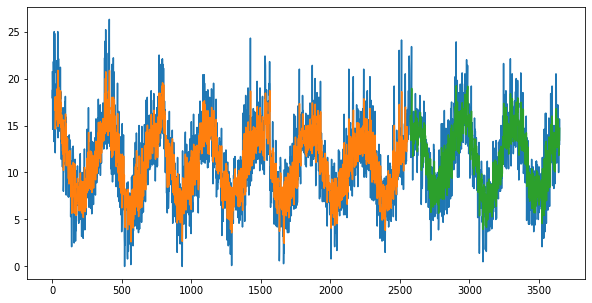

In [140]:
# plot baseline and predictions
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()